In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pathlib import Path
import scipy as stats
import numpy as np

In [2]:
restaruantpath= Path("csv_folder/restaurant_data.csv")
restaruantfile=pd.read_csv(restaruantpath,encoding="UTF-8")
restaruantfile


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
1,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
2,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
3,40944945,Stage 42,Manhattan,422,WEST 42 STREET,10036.0,2125867610,American,09/24/2015,Establishment re-opened by DOHMH.,...,Cycle Inspection / Reopening Inspection,40.758823,-73.993607,104.0,3.0,11500.0,1087184.0,1.010518e+09,MN15,NaN
4,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Administrative Miscellaneous / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN
1423,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Smoke-Free Air Act / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN
1424,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN
1425,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN


In [121]:
# #Normalize Inspection Date columns
# query_df['inspection_date']=pd.to_datetime(query_df['inspection_date']).dt.normalize()
# print(query_df['inspection_date'].head())
# print(query_df.dtypes)


In [3]:
#Delete unnessecary columns
restaurants_to_keep=['CAMIS','VIOLATION DESCRIPTION','DBA','BORO', 'ZIPCODE','CUISINE DESCRIPTION','INSPECTION DATE','GRADE']
restaruantfile=restaruantfile[restaurants_to_keep].copy()
#restaruantfile = restaruantfile.drop(columns=['BUILDING','STREET', 'PHONE', 'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA', 'RECORD DATE', 'GRADE DATE'])
restaruantfile.head()

,CAMIS,VIOLATION DESCRIPTION,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE
0,50041177,Proper sanitization not provided for utensil w...,FIRSTLIVE STUDIO,Brooklyn,11221.0,Other,09/24/2015,NaN
1,50041177,Appropriately scaled metal stem-type thermomet...,FIRSTLIVE STUDIO,Brooklyn,11221.0,Other,09/24/2015,NaN
2,50041177,Hand washing facility not provided in or near ...,FIRSTLIVE STUDIO,Brooklyn,11221.0,Other,09/24/2015,NaN
3,40944945,Plumbing not properly installed or maintained;...,Stage 42,Manhattan,10036.0,American,09/24/2015,P
4,50041177,“Choking first aid” poster not posted. “Alcoho...,FIRSTLIVE STUDIO,Brooklyn,11221.0,Other,09/24/2015,NaN


In [4]:
#Drop restaurants that don't have a grade (i.e., NaN) from the dataframe
#query_df['grade'].unique()
clean_grade_df = restaruantfile.dropna(subset=['GRADE'])



In [5]:
#getting unique value lists which should be helpful later when making calls. this syntax can work for any column.
clean_grade_df['CUISINE DESCRIPTION'].unique().tolist()
clean_grade_df['BORO'].unique().tolist()

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

In [6]:
#the code worked but i think we will have to run the dates through that filter code to get it sorted. I am holdingoff until class to do this.
clean_grade_df.sort_values('INSPECTION DATE',ascending=False)
clean_grade_df.head()

,CAMIS,VIOLATION DESCRIPTION,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE
3,40944945,Plumbing not properly installed or maintained;...,Stage 42,Manhattan,10036.0,American,09/24/2015,P
5,40944945,Non-food contact surface improperly constructe...,Stage 42,Manhattan,10036.0,American,10/14/2015,A
6,40944945,Plumbing not properly installed or maintained;...,Stage 42,Manhattan,10036.0,American,10/14/2015,A
8,50015538,Plumbing not properly installed or maintained;...,AMERICAN AIRLINES THEATER,Manhattan,10036.0,American,11/19/2015,A
9,50015538,Hand washing facility not provided in or near ...,AMERICAN AIRLINES THEATER,Manhattan,10036.0,American,11/19/2015,A


In [7]:
#Restrict dataset to just September 2010 to September 2017
clean_grade_df['INSPECTION DATE'] = pd.to_datetime(clean_grade_df['INSPECTION DATE']).dt.date
clean_grade_df['Date']=clean_grade_df['INSPECTION DATE']
clean_grade_df['ZIPCODE'].fillna(-1,inplace=True)
clean_grade_df['ZIPCODE'] = clean_grade_df['ZIPCODE'].astype(int)
clean_grade_df

C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_34564\1024405262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_grade_df['INSPECTION DATE'] = pd.to_datetime(clean_grade_df['INSPECTION DATE']).dt.date
C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_34564\1024405262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_grade_df['Date']=clean_grade_df['INSPECTION DATE']
C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_34564\1024405262.py:4: FutureWarning: A value is trying to be set on a copy 

,CAMIS,VIOLATION DESCRIPTION,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,Date
3,40944945,Plumbing not properly installed or maintained;...,Stage 42,Manhattan,10036,American,2015-09-24,P,2015-09-24
5,40944945,Non-food contact surface improperly constructe...,Stage 42,Manhattan,10036,American,2015-10-14,A,2015-10-14
6,40944945,Plumbing not properly installed or maintained;...,Stage 42,Manhattan,10036,American,2015-10-14,A,2015-10-14
8,50015538,Plumbing not properly installed or maintained;...,AMERICAN AIRLINES THEATER,Manhattan,10036,American,2015-11-19,A,2015-11-19
9,50015538,Hand washing facility not provided in or near ...,AMERICAN AIRLINES THEATER,Manhattan,10036,American,2015-11-19,A,2015-11-19
...,...,...,...,...,...,...,...,...,...
1393,50000360,Facility not vermin proof. Harborage or condit...,CB CHARISMA BALLROOM,Queens,11367,Other,2017-12-18,A,2017-12-18
1396,50000360,Evidence of mice or live mice present in facil...,CB CHARISMA BALLROOM,Queens,11367,Other,2017-12-18,A,2017-12-18
1403,41251712,"Food contact surface not properly washed, rins...",UNDERGROUND LOUNGE,Queens,11419,Caribbean,2017-12-21,A,2017-12-21
1409,41251712,Food not protected from potential source of co...,UNDERGROUND LOUNGE,Queens,11419,Caribbean,2017-12-21,A,2017-12-21


In [8]:
#Need denominator to be unique restaurants

clean_grade_unique=clean_grade_df.drop_duplicates(subset=['CAMIS'])
clean_grade_unique.reset_index(drop=True, inplace=True)
clean_grade_unique

,CAMIS,VIOLATION DESCRIPTION,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,Date
0,40944945,Plumbing not properly installed or maintained;...,Stage 42,Manhattan,10036,American,2015-09-24,P,2015-09-24
1,50015538,Plumbing not properly installed or maintained;...,AMERICAN AIRLINES THEATER,Manhattan,10036,American,2015-11-19,A,2015-11-19
2,50015171,Food not protected from potential source of co...,NEW AMSTERDAM THEATER,Manhattan,10036,American,2015-11-20,A,2015-11-20
3,50041177,Proper sanitization not provided for utensil w...,FIRSTLIVE STUDIO,Brooklyn,11221,Other,2016-01-21,A,2016-01-21
4,41589635,"Food contact surface not properly washed, rins...",PRODUCERS LOUNGE,Manhattan,10036,American,2016-03-11,A,2016-03-11
...,...,...,...,...,...,...,...,...,...
367,41611698,Non-food contact surface improperly constructe...,WINNER'S CIRCLE COFFEE SHOP,Queens,11420,American,2017-11-09,A,2017-11-09
368,41681923,Non-food contact surface improperly constructe...,MIST HARLEM,Manhattan,10026,American,2017-11-27,B,2017-11-27
369,50062880,"Sanitized equipment or utensil, including in-u...",ONE LENOX,Manhattan,10065,American,2017-12-04,A,2017-12-04
370,41591307,Non-food contact surface improperly constructe...,FORTUNE COOKIE,Queens,11420,Chinese,2017-12-05,A,2017-12-05


In [9]:
# QUESTION 1: How many unique A, B, C restaurants were there in New York City from September 2010-September 2017?
gradecountscitywide=clean_grade_unique['GRADE'].value_counts()
gradecountscitywide

#Pie chart


GRADE
A    349
B     14
C      7
P      1
N      1
Name: count, dtype: int64

In [10]:
# Extract unique cuisine descriptions
cuisinedescriptions = clean_grade_unique['CUISINE DESCRIPTION'].unique()
cuisinedescriptions

array(['American', 'Other', 'Korean', 'Latin American', 'Frozen Desserts',
       'Hotdogs', 'Pizza', 'French', 'Bottled Beverages', 'Italian',
       'Tex-Mex', 'Japanese', 'Spanish', 'Coffee/Tea', 'Mediterranean',
       'Caribbean', 'Middle Eastern', 'German', 'Hamburgers',
       'Sandwiches/Salads/Mixed Buffet', 'Vegan', 'Bagels/Pretzels',
       'Jewish/Kosher', 'Filipino', 'Indian', 'Sandwiches', 'Seafood',
       'Chinese', 'Eastern European', 'Donuts', 'Soups/Salads/Sandwiches',
       'Juice, Smoothies, Fruit Salads', 'African', 'Russian', 'Mexican',
       'Steakhouse', 'Irish', 'Ethiopian'], dtype=object)

In [11]:
# Pare down list of cuisines for Chi-Square test

# Define a mapping dictionary for collapsing cuisines
cuisine_mapping = {
    'American': 'American',
    'Other': 'Other',
    'Korean': 'Asian',
    'Mexican': 'Latin American',
    'Latin American': 'Latin American',
    'Frozen Desserts': 'Desserts/Baked Goods',
    'Hotdogs': 'Fast Food',
    'Pizza': 'Pizza',
    'French':'European',
    'Bottled Beverages':'Coffee/Tea/Beverages',
    'Italian':'Italian',
    'Tex-Mex':'Latin American',
    'Japanese':'Asian',
    'Spanish':'European',
    'Coffee/Tea':'Coffee/Tea/Beverages',
    'Mediterranean':'European',
    'Caribbean':'Caribbean',
    'Middle Eastern': 'Middle Eastern',
    'German':'European',
    'Hamburgers':'Fast Food',
    'Sandwiches/Salads/Mixed Buffet':'Deli',
    'Vegan':'Special Diet',
    'Bagels/Pretzels':'Deli',
    'Jewish/Kosher':'Special Diet',
    'Filipino':'Asian',
    'Indian':'Indian',
    'Sandwiches':'Deli',
    'Seafood':'Seafood',
    'Chinese':'Asian',
    'Eastern European':'European',
    'Donuts':'Desserts/Baked Goods',
    'Soups/Salads/Sandwiches':'Deli',
    'Juice, Smoothies, Fruit Salads':'Juices/Smoothies',
    'African':'African',
    'Russian':'European',
    'Ethiopian':'African',
    'Mexican':'Latin American',
    'Steakhouse':'Steakhouse',
    'Irish':'European'
}

# Replace values in the 'CUISINES' column using the mapping dictionary
clean_grade_unique['CollapsedCUISINES'] = clean_grade_unique['CUISINE DESCRIPTION'].replace(cuisine_mapping)

cuisinedescriptionsnew = clean_grade_unique['CollapsedCUISINES'].unique()
cuisinedescriptionsnew



C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_34564\1772851915.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_grade_unique['CollapsedCUISINES'] = clean_grade_unique['CUISINE DESCRIPTION'].replace(cuisine_mapping)


array(['American', 'Other', 'Asian', 'Latin American',
       'Desserts/Baked Goods', 'Fast Food', 'Pizza', 'European',
       'Coffee/Tea/Beverages', 'Italian', 'Caribbean', 'Middle Eastern',
       'Deli', 'Special Diet', 'Indian', 'Seafood', 'Juices/Smoothies',
       'African', 'Steakhouse'], dtype=object)

In [12]:
#1b Is there an association between restaurant type and rating among unique restaurants? -Chi-Square
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pd.crosstab(clean_grade_unique['CollapsedCUISINES'], clean_grade_unique['GRADE']))

print("Chi-square test statistic:", chi2)
print(f"p-value: {p:.5f}")
print("Degress of Freedom:", dof)

cuisinebyratingdf=pd.crosstab(clean_grade_unique['CollapsedCUISINES'], clean_grade_unique['GRADE'])
cuisinebyratingdf



Chi-square test statistic: 83.92047656181035
p-value: 0.15910
Degress of Freedom: 72


GRADE,A,B,C,N,P
CollapsedCUISINES,,,,,
African,2,0,0,0,0
American,240,5,2,1,1
Asian,16,2,1,0,0
Caribbean,3,1,0,0,0
Coffee/Tea/Beverages,18,1,1,0,0
Deli,11,0,0,0,0
Desserts/Baked Goods,5,0,0,0,0
European,8,2,1,0,0
Fast Food,11,0,0,0,0


In [ ]:
#Describe these 7 restaurants with C ratings: Where are they located? What are their names?

In [ ]:
# QUESTION 3: Number of grades by Borough
#restaurantcount = clean_grade_df.groupby(['BORO', 'DBA']).size().reset_index(name='count')


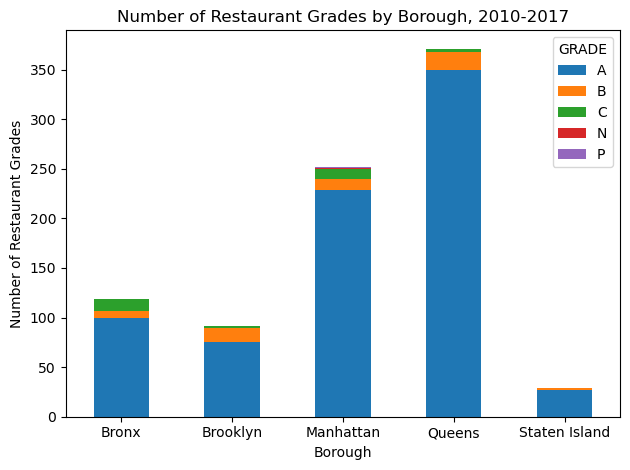

In [13]:
# QUESTION 3: Number of grades by Borough
gradecounts= clean_grade_df.groupby(['BORO', 'GRADE']).size().reset_index(name='count')

boroughs = gradecounts['BORO']
counts = gradecounts['count']
grades = gradecounts['GRADE']

transposecounts = gradecounts.pivot(index='BORO', columns='GRADE', values='count').fillna(0)

transposecounts.plot(kind='bar', stacked=True)
plt.xlabel('Borough')
plt.ylabel('Number of Restaurant Grades')
plt.title('Number of Restaurant Grades by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

#Pie Chart for each Borough

In [15]:
uniquerestboro=clean_grade_unique.groupby('BORO').count()
boro_count=uniquerestboro['CAMIS']
boro_count

BORO
Bronx             62
Brooklyn          35
Manhattan        104
Queens           159
Staten Island     12
Name: CAMIS, dtype: int64

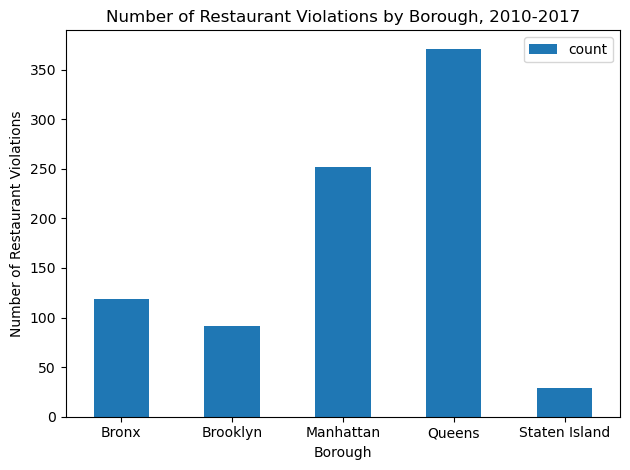

In [16]:
#QUESTION 3a: Do certain boroughs have more restaurant violations?
violationcount= clean_grade_df.groupby(['BORO']).size().reset_index(name='count')



#ratboroughs = ratcounting['Borough']
#ratcounts = ratcounting.groupby('Borough').count()['Complaint Type']


#rattransposecounts = ratcounting.pivot(index='Borough', columns=ratboroughs, values=ratcounts).fillna(0)

violationcount.plot(kind='bar', x='BORO', y='count')
plt.xlabel('Borough')
plt.ylabel('Number of Restaurant Violations')
plt.title('Number of Restaurant Violations by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [139]:
#Do certain Zip Codes have higher restaurant ratings?
#zipcountscitywide=clean_grade_unique['ZIPCODE'].value_counts()
#zipcountscitywide

ZIPCODE
-1        68
 10451    43
 11430    30
 10036    18
 11369    12
          ..
 11204     1
 10017     1
 11102     1
 10030     1
 10065     1
Name: count, Length: 95, dtype: int64

In [ ]:
print(clean_grade_df.columns)

Index(['CAMIS', 'VIOLATION DESCRIPTION', 'DBA', 'BORO', 'ZIPCODE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'GRADE', 'Date',
       'CollapsedCUISINES'],
      dtype='object')


BEGIN RAT DATA DO NOT PUT PIZZA DATA BELOW

In [ ]:
ratpath= Path("csv_folder/rat_sightings.csv")
ratfile=pd.read_csv(ratpath,encoding="UTF-8")
ratfile.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,9/4/2015 0:00,9/18/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,9/4/2015 0:00,10/28/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,9/4/2015 0:00,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,9/4/2015 0:00,9/14/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,9/4/2015 0:00,9/22/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


In [ ]:
#came up with way to easily filter the main DF by columns. This can easily be amended by adding column titles to columns_to_keep and rerunning the block.
#i took facility type out Facililty Type because it is only Nans. scroll down to see output confirming.
columns_to_keep=['Borough','Incident Zip','Created Date','Location Type','City','Status','Complaint Type']
clean_rats_df=ratfile[columns_to_keep].copy()
clean_rats_df

,Borough,Incident Zip,Created Date,Location Type,City,Status,Complaint Type
0,MANHATTAN,10006.0,9/4/2015 0:00,3+ Family Mixed Use Building,NEW YORK,Closed,Rodent
1,STATEN ISLAND,10306.0,9/4/2015 0:00,Commercial Building,STATEN ISLAND,Closed,Rodent
2,STATEN ISLAND,10310.0,9/4/2015 0:00,1-2 Family Dwelling,STATEN ISLAND,Assigned,Rodent
3,BROOKLYN,11206.0,9/4/2015 0:00,3+ Family Apt. Building,BROOKLYN,Closed,Rodent
4,BRONX,10462.0,9/4/2015 0:00,3+ Family Mixed Use Building,BRONX,Closed,Rodent
...,...,...,...,...,...,...,...
101909,BROOKLYN,11207.0,2/15/2017 0:00,3+ Family Mixed Use Building,BROOKLYN,Pending,Rodent
101910,BROOKLYN,11233.0,2/14/2017 0:00,3+ Family Apt. Building,BROOKLYN,Closed,Rodent
101911,BROOKLYN,11213.0,2/14/2017 0:00,3+ Family Mixed Use Building,BROOKLYN,Closed,Rodent
101912,QUEENS,11105.0,2/14/2017 0:00,1-2 Family Dwelling,Astoria,Pending,Rodent


In [ ]:
#fixed the zip code formatting, had to fill NaNs but we can discuss dropping them maybe? Im having trouble picturing how it will effect the final project.
#next we need to run that code on the date here, i cant seem to locate it
clean_rats_df['Incident Zip'].fillna(-1,inplace=True)
clean_rats_df['Incident Zip'] = clean_rats_df['Incident Zip'].astype(int)
clean_rats_df['Created Date'] = pd.to_datetime(clean_rats_df['Created Date']).dt.date
clean_rats_df['Date']=clean_rats_df['Created Date']
clean_rats_df['ZIPCODE']=clean_rats_df['Incident Zip']
clean_rats_df

,Borough,Incident Zip,Created Date,Location Type,City,Status,Complaint Type,Date,ZIPCODE
0,MANHATTAN,10006,2015-09-04,3+ Family Mixed Use Building,NEW YORK,Closed,Rodent,2015-09-04,10006
1,STATEN ISLAND,10306,2015-09-04,Commercial Building,STATEN ISLAND,Closed,Rodent,2015-09-04,10306
2,STATEN ISLAND,10310,2015-09-04,1-2 Family Dwelling,STATEN ISLAND,Assigned,Rodent,2015-09-04,10310
3,BROOKLYN,11206,2015-09-04,3+ Family Apt. Building,BROOKLYN,Closed,Rodent,2015-09-04,11206
4,BRONX,10462,2015-09-04,3+ Family Mixed Use Building,BRONX,Closed,Rodent,2015-09-04,10462
...,...,...,...,...,...,...,...,...,...
101909,BROOKLYN,11207,2017-02-15,3+ Family Mixed Use Building,BROOKLYN,Pending,Rodent,2017-02-15,11207
101910,BROOKLYN,11233,2017-02-14,3+ Family Apt. Building,BROOKLYN,Closed,Rodent,2017-02-14,11233
101911,BROOKLYN,11213,2017-02-14,3+ Family Mixed Use Building,BROOKLYN,Closed,Rodent,2017-02-14,11213
101912,QUEENS,11105,2017-02-14,1-2 Family Dwelling,Astoria,Pending,Rodent,2017-02-14,11105


In [ ]:
clean_rats_df.columns

Index(['Borough', 'Incident Zip', 'Created Date', 'Location Type', 'City',
       'Status', 'Complaint Type', 'Date', 'ZIPCODE'],
      dtype='object')

In [ ]:
#QUESTION 2: How many rat sightings were there in New York City from September 2010-September 2017?
clean_rats_df['Complaint Type'].value_counts()

Complaint Type
Rodent    101914
Name: count, dtype: int64

In [ ]:
merged_df=pd.merge(clean_grade_df,clean_rats_df, on='Date')



In [ ]:
zip_merge=pd.merge(clean_grade_df,clean_rats_df, on='ZIPCODE')

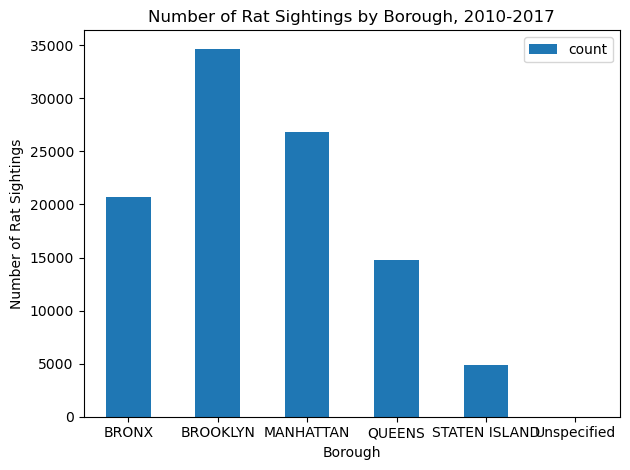

In [ ]:
#QUESTION 4: Do certain boroughs have more rat sightings?
ratcounting=  clean_rats_df.groupby(['Borough']).size().reset_index(name='count')

#ratboroughs = ratcounting['Borough']
#ratcounts = ratcounting.groupby('Borough').count()['Complaint Type']


#rattransposecounts = ratcounting.pivot(index='Borough', columns=ratboroughs, values=ratcounts).fillna(0)

ratcounting.plot(kind='bar', x='Borough', y='count')
plt.xlabel('Borough')
plt.ylabel('Number of Rat Sightings')
plt.title('Number of Rat Sightings by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [ ]:
#consider per capita data. Find population and divide the rat sightings by the number of people.

In [ ]:
borough_pops=pd.Series([{'BRONX':1471160},
                {'BROOKLYN':2736074},
                {'MANHATTAN':1694251},
                {'QUEENS':2405464},
                {'STATEN ISLAND':495747}],index=)
borough_pops

SyntaxError: invalid syntax (366860513.py, line 5)

In [ ]:
dict_lis=[{'BRONX':1471160},
                {'BROOKLYN':2736074},
                {'MANHATTAN':1694251},
                {'QUEENS':2405464},
                {'STATEN ISLAND':495747}]

In [ ]:
[dict_lis]

In [ ]:
borough_count=clean_rats_df['Borough'].value_counts()
borough_count.pop('Unspecified')

In [ ]:
borough_count['BROOKLYN']

In [ ]:
?pd.Series